In [ ]:
"Pedram Sha'banzadeh",
"97105288"

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy import stats
import math

In [ ]:
A=np.array([[10, 20, 30], [5, 10, 15], [1, 5 , 10]])
B=np.array([[[15, 30, 45], [20, 35, 50], [25, 40, 55]], [[20, 35, 50], [25, 40, 55], [30, 45, 60]], [[25, 40, 55], [30, 45, 60], [35, 50, 65]], [[30, 45, 60], [35, 50, 65], [40, 55, 70]]])
print("A=", A,"\n", "\n","B=", B)

A= [[10 20 30]
 [ 5 10 15]
 [ 1  5 10]] 
 
 B= [[[15 30 45]
  [20 35 50]
  [25 40 55]]

 [[20 35 50]
  [25 40 55]
  [30 45 60]]

 [[25 40 55]
  [30 45 60]
  [35 50 65]]

 [[30 45 60]
  [35 50 65]
  [40 55 70]]]


In [ ]:
BA=np.array([[[15,30,45],[20,35,50],[25,40,55]],[[20,35,50],[25,40,55],[30,45,60]],[[25,40,55],[30,45,60],[35,50,65]],A])
print(BA)

[[[15 30 45]
  [20 35 50]
  [25 40 55]]

 [[20 35 50]
  [25 40 55]
  [30 45 60]]

 [[25 40 55]
  [30 45 60]
  [35 50 65]]

 [[10 20 30]
  [ 5 10 15]
  [ 1  5 10]]]


In [ ]:
B[[0,3],:,:]=B[[3,0],:,:]
print(B)
#changing it back for further codes:
B[[0,3],:,:]=B[[3,0],:,:]

[[[30 45 60]
  [35 50 65]
  [40 55 70]]

 [[20 35 50]
  [25 40 55]
  [30 45 60]]

 [[25 40 55]
  [30 45 60]
  [35 50 65]]

 [[15 30 45]
  [20 35 50]
  [25 40 55]]]


In [ ]:
BT=np.transpose(B)
print(BT)

[[[15 20 25 30]
  [20 25 30 35]
  [25 30 35 40]]

 [[30 35 40 45]
  [35 40 45 50]
  [40 45 50 55]]

 [[45 50 55 60]
  [50 55 60 65]
  [55 60 65 70]]]


In [ ]:
print(B[0,:,:]*B[1,:,:]*B[2,:,:]*B[3,:,:])

[[  225000  1890000  7425000]
 [  525000  3150000 10725000]
 [ 1050000  4950000 15015000]]


In [ ]:
print(np.linalg.det(A))

0.0


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/IMDB-Movie-Data.xlsx")
print(df.loc[0:4])

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

In [143]:
a=df["Actors"].values
x=""
l1=[]
l2=[]
l3=[]
l4=[]
for i in a:
    for j in range(0, len(i)):
        if (i[j]==",") or (i[j]==" " and i[j-1]==","):
            l1.append(x)
            x=""
        elif j==len(i)-1:
            x=x+i[j]
            l1.append(x)
            x="" 
        else:
            x=x+i[j]
while '' in l1:
  l1.remove('')

for z in l1:
  c=l1.count(z)
  l2.append(c)

for i in l1:
  if i in l3:
    continue
  else:
    l3.append(i)
    l4.append(l2[l1.index(i)])

m=np.array([l3,l4])
mt=np.transpose(m)
mt = mt[mt[:, 0].argsort()]
print(mt)
mt = mt[mt[:, 1].argsort()]
print(mt)

[['50 Cent' '1']
 ['A.C. Peterson' '1']
 ['AJ Michalka' '1']
 ...
 ['Ã“lafur Darri Ã“lafsson' '1']
 ['Ã“scar Jaenada' '1']
 ['Ã‰milie Leclerc' '1']]
[['50 Cent' '1']
 ['Lorraine Nicholson' '1']
 ['Lori Petty' '1']
 ...
 ['Ben Kingsley' '9']
 ['Owen Wilson' '9']
 ['Tom Hanks' '9']]


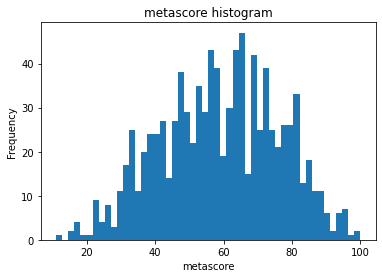

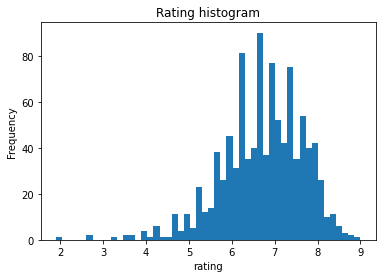

In [154]:
meta=df["Metascore"].values
lm=[]
for i in meta:
  lm.append(i)
plt.hist(lm, bins=50)
plt.xlabel('metascore')
plt.ylabel('Frequency')
plt.title('metascore histogram')
plt.show()

rate=df["Rating"].values
lr=[]
for i in rate:
  lr.append(i)
plt.hist(lr, bins=50)
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.title('Rating histogram')
plt.show()


In [186]:
from re import L
v=df["Votes"].values
lv=[]
for i in v:
  lv.append(v)

met=np.array(lm)
rat=np.array(lr)
vot=np.array(lv)
result = sc.stats.pearsonr(lr,lv)
print(result)

PearsonRResult(statistic=nan, pvalue=nan)


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [197]:
f=open("/content/drive/MyDrive/Question 3.txt", "w")
for i in l3:
  f.write(i)
  f.write("\n")
f.close()  

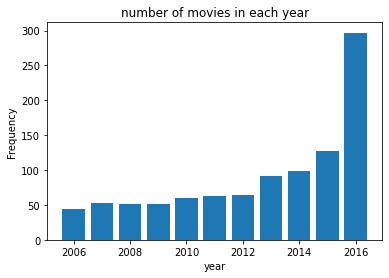

In [202]:
b=df["Year"].values
x=""
l5=[]
l6=[]
l7=[]
l8=[]
for i in b:
    l5.append(i)

for z in l5:
  c2=l5.count(z)
  l6.append(c2)

for i in l5:
  if i in l7:
    continue
  else:
    l7.append(i)
    l8.append(l6[l5.index(i)])

plt.bar(l7,l8)
plt.xlabel("year")
plt.ylabel("Frequency")
plt.title("number of movies in each year")
plt.show()

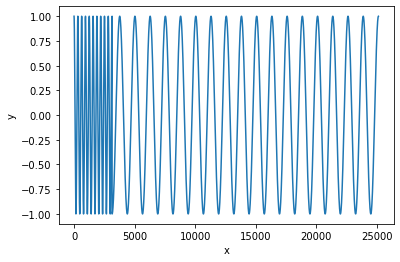

In [211]:
lx=[]
lf=[]
for x in range(0,3142,1):
  f=math.cos(x/50)
  lx.append(x)
  lf.append(f)

for x in range(3142, 25132, 1):
  f=math.cos(x/200)
  lx.append(x)
  lf.append(f)

plt.plot(lx,lf)
plt.xlabel("x")
plt.ylabel("y")
plt.show()